<a href="https://colab.research.google.com/github/jiruneko/3Dpeg/blob/master/Dive_Scikit_learn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)
target_pred = tree.predict(data_test)

In [3]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
cross_val_score(tree, data, target, cv=10, scoring='accuracy')

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [6]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"予測購入確率": np.array([0.99, 0.97, 0.91, 0.88, 0.82, 0.81, 0.79, 0.74, 0.65, 0.6, 0.53, 0.50, 0.41, 0.39, 0.33, 0.3, 0.25, 0.21, 0.18, 0.17]),
                    "実績": np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]),
                    "真陽性率": np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 12, 12])/12,
                    "偽陽性率": np.array([0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8])/8})
df

,予測購入確率,実績,真陽性率,偽陽性率
0,0.99,1,0.083333,0.000
1,0.97,0,0.083333,0.125
2,0.91,1,0.166667,0.125
3,0.88,0,0.166667,0.250
4,0.82,1,0.250000,0.250
5,0.81,0,0.250000,0.375
6,0.79,0,0.250000,0.500
7,0.74,1,0.333333,0.500
8,0.65,1,0.416667,0.500
9,0.60,0,0.416667,0.625


In [8]:
tp_data = df.loc[:, "真陽性率"].values
fp_data = df.loc[:, "偽陽性率"].values
fp_data = np.append(0, fp_data)
tp_data = np.append(0, tp_data)
print(tp_data)
print(fp_data)

[0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.25       0.33333333 0.41666667 0.41666667 0.5
 0.58333333 0.66666667 0.66666667 0.75       0.75       0.83333333
 0.91666667 1.         1.        ]
[0.    0.    0.125 0.125 0.25  0.25  0.375 0.5   0.5   0.5   0.625 0.625
 0.625 0.625 0.75  0.75  0.875 0.875 0.875 0.875 1.   ]


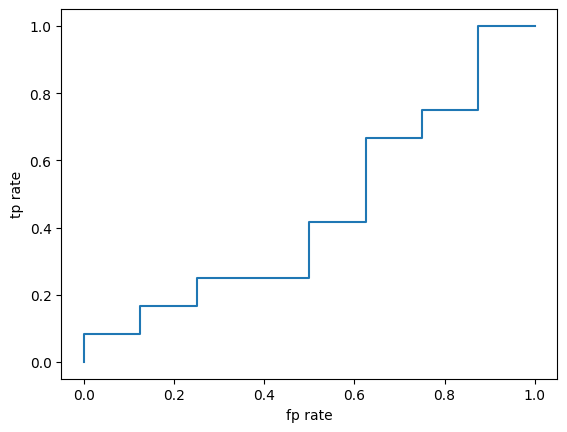

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.step(fp_data, tp_data)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

In [10]:
from sklearn.metrics import roc_curve
target_data = df.loc[:, "実績"].values
pred_rate = df.loc[:, "予測購入確率"].values
fp_rate, tp_rate, threshold = roc_curve(target_data, pred_rate)
print('真陽性率： ', tp_rate)
print('偽陽性率： ', fp_rate)

真陽性率：  [0.         0.08333333 0.08333333 0.16666667 0.16666667 0.25
 0.25       0.41666667 0.41666667 0.66666667 0.66666667 0.75
 0.75       1.         1.        ]
偽陽性率：  [0.    0.    0.125 0.125 0.25  0.25  0.5   0.5   0.625 0.625 0.75  0.75
 0.875 0.875 1.   ]


In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_data, pred_rate)

0.4479166666666667

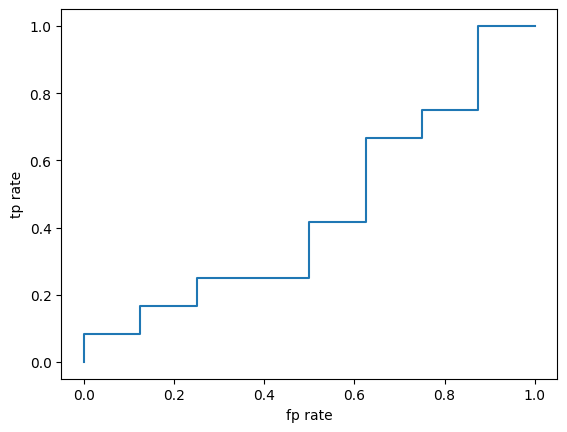

In [12]:
fig, ax = plt.subplots()
ax.step(fp_rate, tp_rate)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()